<a href="https://colab.research.google.com/github/leekh8/Colaboratory/blob/main/OpenCV_005_%ED%94%BD%EC%85%80%EB%B0%8F%EC%B1%84%EB%84%90_%EB%B0%B0%ED%8F%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://arome1004.cafe24.com/images/opencv/lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[5차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ OpenCV를 활용한 이미지 처리 방법에 대해 학습한다.<br>

○ 칼라/흑백/이진 이미지의 픽셀값을 출력하고 픽셀값을 변경해본다.<br>

○ RGB 채널을 분리하고 병합해본다.
</font></td></tr>   
</table>

In [15]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool


# 이미지 처리 기초

- 픽셀 기반 처리 : 이미지를 픽셀 단위로 처리하는 방법
  - 이미지의 특성으로 표현하는 데 한계가 있음, 이미지 처리 속도가 느림
- 블록 기반 처리 : 이미지를 블록 (픽셀을 그룹화한 것)  단위로 처리하는 방법
  - 이미지의 지역적 특성을 잘 표현, 이미지 속도가  빠름  필터링
- 주파수 기반 처리 : 이미지를  주파수 영역으로 변환하여 처리하는 방법
  - 이미지의 전역적 특성으로 잘 표현 - FFT, DCT, WT 등
  
  
- 픽셀 (pixel : picture cell)
  - 이미지를 구성하는 최소 단위
  - 0-255의 값으로 구성 (검정색 0, 흰색 255)
  
  <img src="https://arome1004.cafe24.com/images/opencv/lecture_image/05_pixel.png">
  
  
- 블럭 (block)
  - 근방의 픽셀을 그룹핑한 것  
  - 근방의 픽셀은 유사한 특성을 가진다는 것을 가정
  - 일반적으로 블럭간에 중복을 시켜서 처리 – 블럭간의 Locality반영
  
    <img src="https://arome1004.cafe24.com/images/opencv/lecture_image/05_block.png" width=70%>
    
    
- 주파수 (frequency)
  -  주파수 (frequency) : 이미지 픽셀값들을 픽셀값의 변화분으로 변환한 것
  - 이미지에서 주파수 : 픽셀의 변화량
    - 고주파 성분 : 픽셀값의 변화가 큰 부분 (에지)
    - 저주파 성분 : 픽셀값의 변화가 작은 부분
  - 일반적인 이미지는 주로 저주파 성분으로 구성되어 있음
  - 이미지의 중요한 특성은 주로 고주파 성분에 존재

    <img src="https://arome1004.cafe24.com/images/opencv/lecture_image/05_frequency.png" width=70%>

## 이미지 픽셀 값 출력

### 이진 이미지 픽셀 값 출력

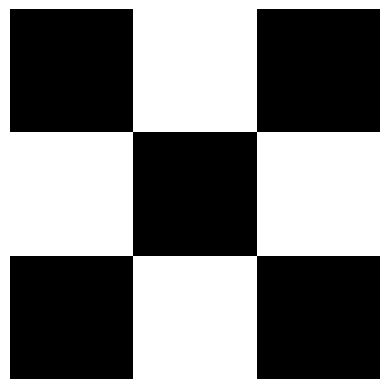

In [5]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

- 이미지의 픽셀값은 0-255 사이 값으로 구성 (8bit 양의 정수 형태)
- 검정색은 0, 흰색은 255

In [6]:
#실습
print(img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

### 그레이 이미지 픽셀 값 출력

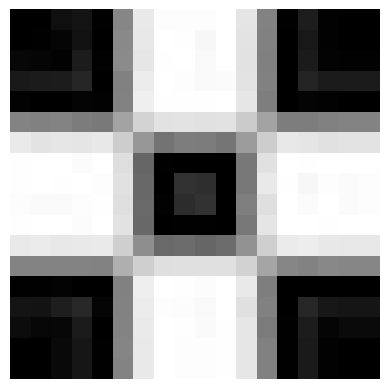

In [7]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/checkerboard_fuzzy_18x18.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [8]:
#실습
print(img)

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

### 칼라 이미지 픽셀 값 출력

- 픽셀값 접근/변경
   -  픽셀값은 numpy 배열 형태로 접근하고 변경
     - img[200, 100] : 픽셀의 좌표
     - Red, Green, Blue 순으로 출력

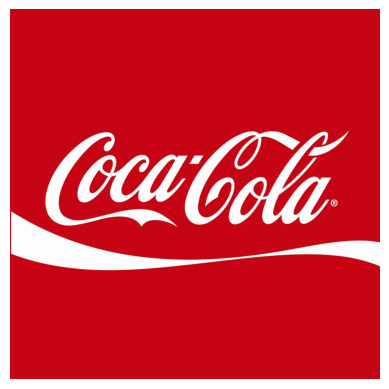

In [9]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/coca-cola-logo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

In [10]:
#실습
img.shape

(700, 700, 3)

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>
○ 다른 이미지의 픽셀값을 출력해 보자.<br>
   </td></tr>   
</table>

## 픽셀값 변경

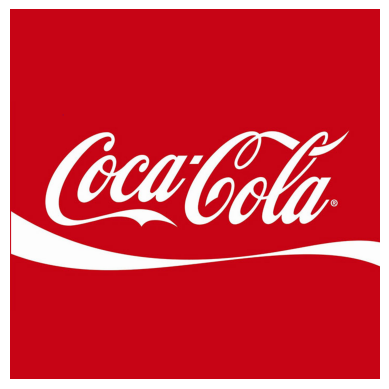

In [11]:
#실습
img[200, 100] = [ 0, 0, 255]

plt.imshow(img)
plt.axis("off")
plt.show()

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>
○ 다른 이미지의 픽셀값을 변경해 보자.<br>
   </td></tr>   
</table>

# RGB 채널 다루기

- 이미지 채널
     - 흑백은 1개의 채널 이미지로 구성되고, 칼라는 Red, Green, Blue 3개의 채널 이미지로 구성

    <img src="https://arome1004.cafe24.com/images/opencv/lecture_image/05_image_channel.png" width=50%>

## RGB 채널 분리하기

- <font color=red>변수 = img[:, :, 채널번호]</font>

  - img[:, :, 0] : red 채널
  - img[:, :, 1] : green 채널
  - img[:, :, 2] : blue 채널

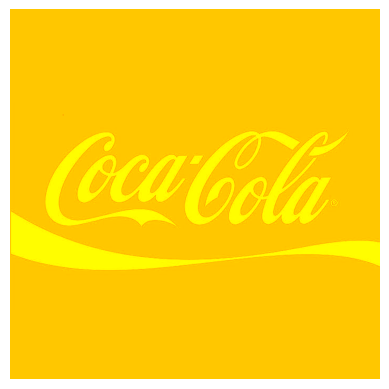

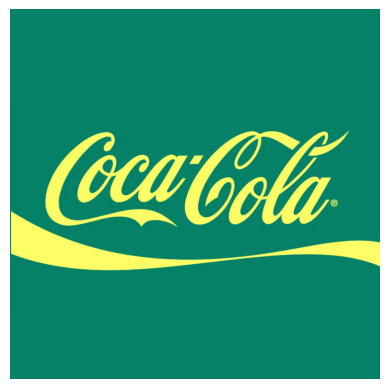

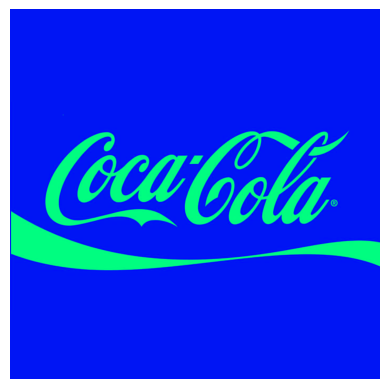

In [12]:
#실습
r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]

plt.imshow(r,cmap="autumn")
plt.axis("off")
plt.show()

plt.imshow(g,cmap="summer")
plt.axis("off")
plt.show()

plt.imshow(b,cmap="winter")
plt.axis("off")
plt.show()

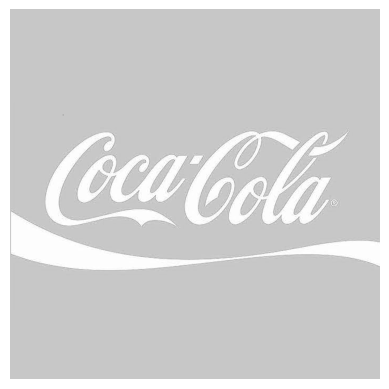

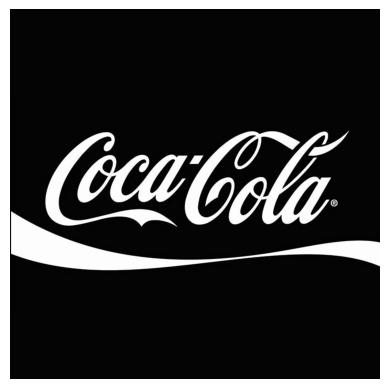

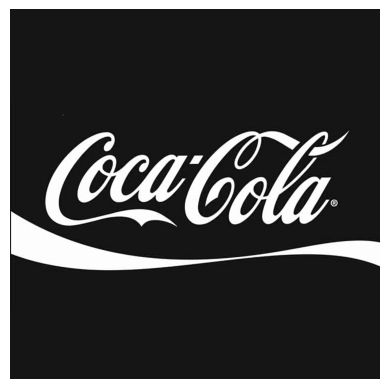

In [13]:
r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]

plt.imshow(r,cmap="gray")
plt.axis("off")
plt.show()

plt.imshow(g,cmap="gray")
plt.axis("off")
plt.show()

plt.imshow(b,cmap="gray")
plt.axis("off")
plt.show()

- 흰색이 가까울수록 픽셀 수가 많다는 것을 의미

## RGB 채널 합치기

- cv2.merge((r, g, b) : RGB 각 채널을 합침

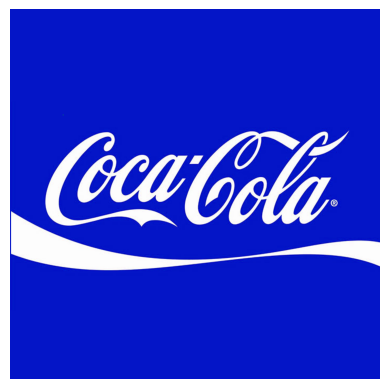

In [14]:
#실습
rgb = cv2.merge((g, b, r))

plt.imshow(rgb)
plt.axis("off")
plt.show()

## 픽셀값을 RGB 채널 값을 이용해서 변경하기

- <font color=red>img.itemset((x, y, 0), 0)</font>
  - itemset((픽셀y위치, 픽셀x위치, 채널), 색상레벨)
  - 채널 (0 : Red, 1 : Green, 2 : Blue)  
  - 0번 채널의 (x, y) 픽셀의 값을 0으로 변경  

In [ ]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>
○ 다른 채널의 픽셀값을 변경해 보자.<br>
   </td></tr>   
</table>

# 이미지의 속성 출력

- img.shape : 이미지의 크기 및 채널
- img.size : 이미지의 전체 픽셀 수
- img.dtype : 데이터 타입

In [16]:
#실습
img.shape

(700, 700, 3)

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[5차시] 학습요약</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 이미지 처리 방법 : 픽셀기반, 블록기반, 주파수 기반 처리<br>

○ 이미지의 픽셀값은 0-255 사이 값으로 구성 (8bit 양의 정수 형태) - 검정색은 0, 흰색은 255<br>

○ 픽셀값은 3차원 배열 형태로 접근 ([x축, y축, 채널])<br>

○ <font color=red>itemset((x축, y축, 채널), 값)</font> : 해당 채널의 픽셀값을 변경<br><br>

○ <font color=red>img.shape</font> : 이미지 크기<br>

○ <font color=red>img.size</font> : 전체 픽셀 수<br>

○ <font color=red>img.dtype</font> : 데이터 타입
        
</font></td></tr>   
</table>